<a href="https://colab.research.google.com/github/yanisamrouche/data_science/blob/main/TP6_synthese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Master Informatique AMU, ISD, exercice de synthèse (TP6)
# Binome 


*   AMROUCHE Yanis
*   AGUENI Farouk



Voici un exercice vous permettant de synthétiser quelques unes de vos connaissances expérimentales en matière de classification à partir de données. Le code python doit être le plus concis possible.

Etant donné le no-free-lunch theorem, nous vous confions la tâche de déterminer le meilleur modèle pour réaliser une tâche de régression transformée en tâche de classification, avec le test statistique qui garantit ce choix avec grande confiance.

Remettre ce fichier ipynb complété. 


### Préparation des données
Nous allons utiliser un jeu de données réel - tiré de *Tsanas & Xifara : Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools, Energy and Buildings, Vol. 49, pp. 560-567, 2012* - disponible sur Ametice (dataenergy.csv).

Les 8 premières colonnes correspondent aux attributs descriptifs et les deux dernières, aux charges de chauffage et de climatisation (dans cet ordre).
Pour les utiliser en Python, vous pourrez vous servir du code suivant :

In [3]:
import numpy as np
data = np.loadtxt("./dataenergy.csv")
X = data[:,:-2]
Y = data[:,-2:]
Yheat = Y[:,0]
Ycool = Y[:,1]

Le problème initial, tel que présenté ici, est un problème de régression multi-tâches. Nous allons le simplifier en le transformant en un problème de classification dont la classe sera le niveau de charge de chauffage : par une méthode de clustering, on veut répartir les charges de chauffage en 3 classes : faibles, moyennes, élevées.

A vous de jouer :

In [11]:
from sklearn.cluster import KMeans
# La suite ? il s'agit de définir un classifieur du k-means avec k=3 
# et d'utiliser la méthode 'fit' sur lensemble des etiquettes de chauffage Yheat
# Attention : les Y sont des vecteurs et les classifieurs sklearn ont besoin d'array :
# il faut les reshaper : Yheat_vector = Yheat.reshape(-1,1)
# Après apprentissage du kmeans, les classes des données utilisées sont stockées dans mon_classifieur.labels_
Yheat_vector = Yheat.reshape(-1,1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Yheat_vector)
y = kmeans.labels_
print(y)

[1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 0
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 0 2 2 2 2
 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 0 0 0 0 2 2 2 2 2 

### Apprentissage des modèles
Nous voulons comparer deux méthodes de classification supervisée :
1. Les k-plus proches voisins (*KNeighborsClassifier* de la classe *sklearn.neighbors*, hyperparamètre à régler : *n_neighbors*)
2. Les arbres de décision  (*DecisionTreeClassifier* de la classe *sklearn.tree*, hyperparamètre à régler : *max_depth*)

Ecrivez le code permettant de :
1. Séparer les données en un échantillon d'apprentissage et un échantillon de test (60/40)
2. Sélectionner les meilleurs valeurs des hyper-paramètres sur l'échantillon d'apprentissage par validation croisée en utilisant 10 folders (pour optimisation de l'erreur)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40)
dic_param = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15,20]}
score = 'accuracy'
select_hppmt = GridSearchCV(KNeighborsClassifier(), dic_param, cv=10, scoring=score)
select_hppmt.fit(X_train, y_train)
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(select_hppmt.best_params_)


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 3}


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40)
dic_param2 = {'max_depth' : [i for i in range(1,21)]}
score = 'accuracy'
select_hppmt2 = GridSearchCV(DecisionTreeClassifier(), dic_param2, cv=10, scoring=score)
select_hppmt2.fit(X_train, y_train)
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(select_hppmt2.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_depth': 7}
accuracy


### Analyse des résultats
Afficher sur une courbe les scores de chacun des algorithmes avec la meilleure valeur d'hyperparamètre possible sur l'échantillon de **test**.

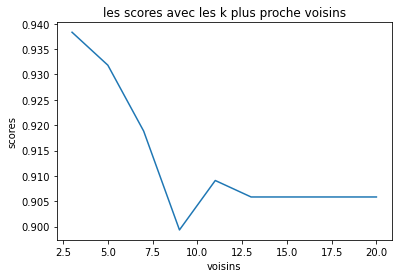

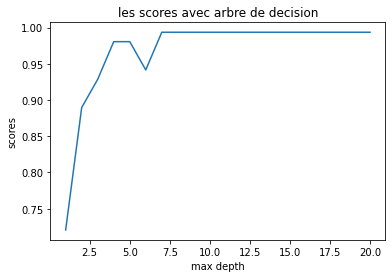

In [20]:
import matplotlib.pyplot as plt
scores_knn = []
for i in dic_param['n_neighbors']:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  scores_knn.append(knn.score(X_test,y_test))
plt.plot(dic_param['n_neighbors'],scores_knn)
plt.xlabel('voisins')
plt.ylabel('scores')
plt.title('les scores avec les k plus proche voisins')
plt.show()
scores_dtree = []
for i in dic_param2['max_depth']:
  dtc = DecisionTreeClassifier(max_depth=i)
  dtc.fit(X_train,y_train)
  scores_dtree.append(dtc.score(X_test,y_test))
plt.plot(dic_param2['max_depth'],scores_dtree)
plt.xlabel('max depth')
plt.ylabel('scores')
plt.title('les scores avec arbre de decision')
plt.show()


Pour chacune des méthodes, pour chaque meilleur hyperparamètre, effectuer le test de McNemar sur l'échantillon test pour décider finalement quel est la meilleure solution pour la prédiction de la charge de chauffage, avec 95% de confiance. 

In [36]:
# k plus proche voisins avec k = 3 
knn_classifieur = KNeighborsClassifier(n_neighbors=3)
knn_classifieur.fit(X_train,y_train)
score = knn_classifieur.score(X_test, y_test)
print(score)
y_pred = knn_classifieur.predict(X_test)

print("les classes prédites par knn : \n",y_pred)

0.9383116883116883
les classes prédites par knn : 
 [1 2 0 2 1 1 2 2 0 0 1 2 1 0 2 1 1 0 1 1 1 0 2 0 2 1 0 0 1 0 0 1 2 1 0 1 1
 0 1 1 2 0 0 1 1 0 1 2 0 1 0 2 2 2 1 0 1 1 1 1 1 2 0 1 1 0 1 2 1 2 1 1 1 1
 1 2 1 1 2 1 2 1 2 2 2 1 1 1 1 2 2 1 1 0 0 0 2 0 0 0 0 2 1 1 0 1 1 2 2 1 2
 2 0 2 1 0 1 2 2 2 1 1 1 1 1 1 1 0 2 1 2 1 0 1 1 2 2 2 0 1 2 1 0 1 2 0 2 1
 1 1 2 2 1 1 2 0 0 2 0 0 1 0 2 2 1 0 1 0 0 1 1 1 0 0 1 1 2 1 0 1 1 1 1 1 0
 2 0 2 2 1 2 1 1 1 1 1 0 2 2 1 1 1 1 1 1 0 1 2 0 1 0 2 1 2 1 1 1 2 1 1 2 1
 1 2 1 2 0 1 1 1 0 1 2 1 1 2 2 0 2 1 0 1 2 2 1 1 1 2 0 1 1 1 1 0 0 1 1 2 1
 1 2 1 1 2 0 2 0 2 1 2 2 1 1 1 0 2 1 1 1 1 1 1 1 1 1 0 0 1 2 1 0 1 1 2 1 1
 1 1 2 0 0 1 0 0 2 0 1 0]


In [35]:
# arbre de decision avec max_depth = 7 
tree_classifieur = DecisionTreeClassifier(max_depth=7)
tree_classifieur.fit(X_train, y_train)
score2 = tree_classifieur.score(X_test, y_test)
print(score2)
y_pred2 = tree_classifieur.predict(X_test)
print(y_pred2)

0.9935064935064936
[1 2 0 0 1 1 2 2 0 0 1 2 1 0 2 1 1 0 1 1 1 0 2 0 2 1 0 0 1 0 0 1 0 1 0 1 1
 0 1 1 2 0 0 1 1 0 1 2 0 1 0 2 2 2 1 0 1 1 1 1 1 2 0 1 1 0 1 2 1 2 1 1 1 1
 1 0 1 1 2 1 2 1 2 2 2 1 1 1 1 0 2 1 1 0 0 0 2 0 0 0 0 2 1 1 0 1 1 2 2 1 2
 2 2 2 1 0 1 2 2 2 1 1 1 1 1 1 1 0 2 1 2 1 0 1 1 2 2 2 0 1 2 1 0 1 2 2 2 1
 1 1 2 2 1 1 2 0 0 2 0 0 1 0 2 2 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 2
 2 0 0 2 1 2 1 1 1 1 1 0 2 2 1 1 1 1 1 1 0 1 2 0 1 0 2 1 2 1 1 1 2 1 1 2 1
 1 2 1 0 0 1 1 1 0 1 2 1 1 2 2 0 0 1 0 1 2 2 1 1 1 1 2 1 1 1 1 2 0 1 1 2 1
 1 2 1 1 2 0 2 0 2 1 1 2 1 1 1 0 2 1 1 1 1 1 1 1 1 1 0 0 1 2 1 0 1 1 2 1 1
 1 1 2 0 0 1 2 0 2 0 1 2]


In [27]:
print('les vrais classes : \n', y_test)

les vrais classes : 
 [1 2 0 0 1 1 2 2 0 0 1 2 1 0 2 1 1 0 1 1 1 0 2 0 2 1 0 0 1 0 0 1 0 1 0 1 1
 0 1 1 2 2 0 1 1 0 1 2 0 1 0 2 2 2 1 0 1 1 1 1 1 2 0 1 1 0 1 2 1 2 1 1 1 1
 1 0 1 1 2 1 2 1 2 2 2 1 1 1 1 0 2 1 1 0 0 0 2 0 0 0 0 2 1 1 0 1 1 2 2 1 2
 2 2 2 1 0 1 2 2 2 1 1 1 1 1 1 1 0 2 1 2 1 0 1 1 2 2 2 0 1 2 1 0 1 2 2 2 1
 1 1 2 2 1 1 2 0 0 2 0 0 1 0 2 2 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 2
 2 2 0 2 1 2 1 1 1 1 1 0 2 2 1 1 1 1 1 1 0 1 2 0 1 0 2 1 2 1 1 1 2 1 1 2 1
 1 2 1 0 0 1 1 1 0 1 2 1 1 2 2 0 0 1 0 1 2 2 1 1 1 1 2 1 1 1 1 2 0 1 1 2 1
 1 2 1 1 2 0 2 0 2 1 1 2 1 1 1 0 2 1 1 1 1 1 1 1 1 1 0 0 1 2 1 0 1 1 2 1 1
 1 1 2 0 0 1 2 0 2 0 1 2]


In [43]:
#test de McNemar 
from math import *
n00, n11, n10, n01 = 0,0,0,0
for i in range(len(y_test)):
  if(y_test[i] != y_pred[i] or y_test[i] != y_pred2[i]):
    n00 += 1
  if(y_test[i] == y_pred[i] or y_test[i] == y_pred2[i]):
    n11 += 1
  if(y_test[i] == y_pred[i] and y_test[i] != y_pred2[i]):
    n10 += 1
  if(y_test[i] != y_pred[i] and y_test[i] == y_pred2[i]):
    n01 += 1
print("( n00 =",n00,", n11 =", n11,", n01 =", n01,", n10 =", n10," )")
somme = n01 + n10
puissance = pow((abs(n01-n10) - 1),2)
resultat = puissance/somme
print(resultat)


( n00 = 19 , n11 = 306 , n01 = 17 , n10 = 0  )
15.058823529411764



```
(|n01 −n10|−1)²/(n01 + n10) > 3.841459 
15.0588235 > 3 
on peut en déduire avec une confiance supérieure `a 95% que l’un des deux classifieurs est meilleur
que l’autre.

```




### Remise du résultat

Alors, quelle est la meilleure solution (algorithme et hyper-paramètres ) ? 

Et enfin, pour cette solution, quelle est le taux réel de bonne classification, estimé par validation croisée 10 folds ? 

In [47]:
# la meilleure solution est : 
# l'algorithme avec l'arbre de decision avec hyper-paramètre max_depth = 7
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_classifieur, X, y, cv=10)
print("le taux réel de bonne classification, estimé par validation croisée 10 folds :",scores.mean())

le taux réel de bonne classification, estimé par validation croisée 10 folds : 0.9544941900205057
